In [ ]:
## This notebook provides a tutorial to calculate PhyloFunc distance using PhyloFunc package
## Users can use pip to install PhyloFunc: 
!pip install PhyloFunc 

In [ ]:
import pandas as pd

In [13]:
# Step1: Prepare the metaproteomic Taxon-Function table in CSV format, 
## Table Instructions:
### Include taxa IDs, functional accessions, and protein intensity.
### First column: Taxa IDs.
### Second column: Functional accession.
### Additional columns: Metaproteomic intensity data.
### Group by taxon-function pairs and sum intensity values.

# Read the example Genome-COG table (i.e. Taxon-Function table)
## The example dataset shows an in vitro human gut microbiome cultured in a RapidAIM assay,
## with or without the presence different concentrations of diclofenac (DCLF).
Genome_COG = pd.read_csv("Genome-COG.csv", sep = ',')

# Additional notes
## "Genome" in the example data refers to Genome IDs in the MGYG (UHGG) database.
## To use the embedded UHGG tree file, users can search with MetaLab-MAG or their own UHGG database.
## Genome ids can be extracted from the protein groups.

In [9]:
# Step2.1: import PhyloFunc package and calculate the PhyloFunc distance 

from PhyloFunc import PhyloFunc_distance

# Let's first perform a PhyloFunc distance calculation with one pair of sample
## Extract a pair of samples
sample_pair=Genome_COG.iloc[:, :4]
sample_pair.to_csv("sample_pair.csv",index=False)

# Compute PhyloFunc distance
## UHGG-based tree is automatically called within the function
## If user use self-defined tree, use the tree_file='user_tree_file.nwk' option.
PhyloFunc_distance(sample_file="sample_pair.csv")

The PhyloFunc distance of "DC.M.48.1" and "DC.H.48.1" is 0.848934829450047.
Finish, time 73.33 seconds


In [12]:
# Step2.2: calculate PhyloFunc distance matrix for all samples
## This may take around one hour for the example dataset.

from PhyloFunc import PhyloFunc_matrix

data_PhyloFunc_all=PhyloFunc_matrix(sample_file="Genome-COG.csv")


Intermediate result 0.8489349045752698
Intermediate result 0.2620734248079076
Intermediate result 0.4624861640103018
Intermediate result 0.8407710418998591
Intermediate result 0.43509764349773483
Intermediate result 0.500674926139445
Intermediate result 0.39279154152208645
Intermediate result 0.4412091854865207
Intermediate result 0.8497605606265916
Intermediate result 0.28292930885723194
Intermediate result 0.43933823955966084
Intermediate result 0.8729610803512116
Intermediate result 0.9604362241196278
Intermediate result 0.5220425963184375
Intermediate result 0.9404192703307763
Intermediate result 0.9881181260905045
Intermediate result 0.9135435285121661
Intermediate result 0.9580156171134901
Intermediate result 0.4048462653821416
Intermediate result 0.8585864258587076
Intermediate result 0.9326358535494432
Intermediate result 0.44028839953017573
Intermediate result 0.8531807355053472
Intermediate result 0.4173763225784313
Intermediate result 0.49179939552461405
Intermediate result 

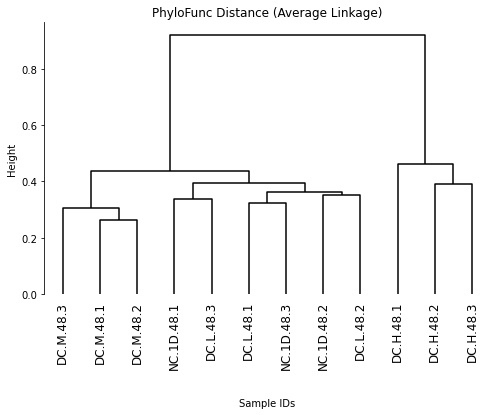

In [39]:
# Step3: Draw a hierarchical clustering plot based on the resulting PhyloFunc matrix
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import pandas as pd

# Generate distance 
data_PhyloFunc = data_PhyloFunc_all.T
data_PhyloFunc_array = squareform(data_PhyloFunc)
linkage_PhyloFunc = linkage(data_PhyloFunc_array, method='average')

# Create a single subplot
fig, ax = plt.subplots(figsize=(8, 5))

dendrogram_kwargs = dict(leaf_rotation=90, color_threshold=0, above_threshold_color='black')

# Plot bierarchical clustering
dendrogram(linkage_PhyloFunc, ax=ax, labels=data_PhyloFunc.index, **dendrogram_kwargs)
ax.set_title('PhyloFunc Distance (Average Linkage)')
ax.set_ylabel('Height')

# Add annotation text
ax.text(0.5, -0.4, "Sample IDs",
        ha='center', va='center', transform=ax.transAxes, fontsize=10)

# Adjust axis style
def style_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
style_axes(ax)
plt.show()
